# Семинар 13

## Кластеризация цифр

Будем работать с набором данных [digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

In [1]:
from sklearn import datasets
import numpy as np
import scipy.misc as misc
from matplotlib import pyplot as plt

In [2]:
digits = datasets.load_digits()

In [3]:
np.random.seed(13)
X, y = digits['data'], digits['target']

perm = np.random.choice(len(X), size=len(X), replace=False)
X, y = X[perm], y[perm]

Кластеризуем данные с помощью k-means:

In [4]:
from sklearn.cluster import KMeans

In [5]:
km = KMeans(n_clusters=10, random_state=13)
km.fit(X)
labels_ = km.predict(X)

In [10]:
np.unique(labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)

Номера кластеров, которые были предсказаны алгоритмом, не имеют ничего общего с настоящими цифрами. Посмотрим, какая цифра представлена больше всего в нулевом кластере. Будем считать, что это кластер, соответствующий этой цифре.

In [6]:
max_digit = np.argmax(np.bincount(y[labels_ == 0]))
print('Most popular digit in 0 cluster: ', max_digit)

Most popular digit in 0 cluster:  5


Найдем объекты, которые по ошибке попали в этот класс. 

In [7]:
incorrect_indices = np.where(np.logical_and(labels_ == 0, y != max_digit))[0]

Визуализируем ошибочные изображения.

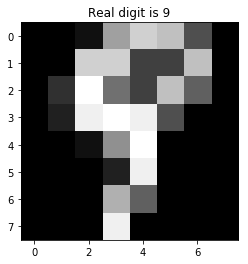

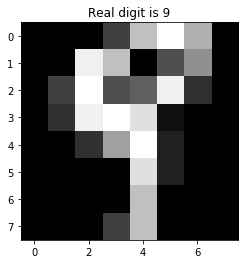

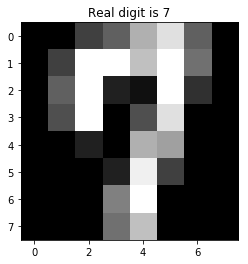

In [8]:
for i in range(3):
    plt.imshow(X[incorrect_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[incorrect_indices[i]]))
    plt.show()

Визуализируем изображения, соответствующие верной цифре.

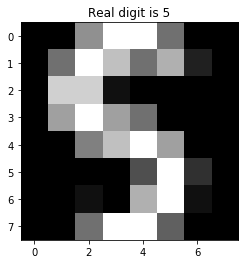

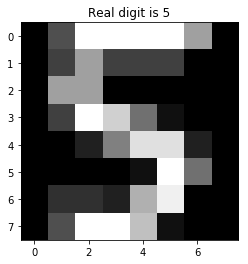

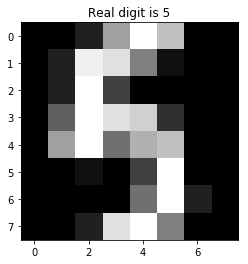

In [11]:
correct_indices = np.where(np.logical_and(labels_ == 0, y == max_digit))[0]

for i in range(3):
    plt.imshow(X[correct_indices[i]].reshape(8, 8), cmap='gray')
    plt.title("Real digit is {}".format(y[correct_indices[i]]))
    plt.show()

Посчитаем метрики качества кластеризации. Существует достаточно много способов оценить качество кластеризации. Также существуют метрики, которые используют знания об истинном разбиении, но есть и метрики, которые это не используют. Одной из метрик, использующих истинное разбиение, является [homogeneity_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html). Пример метрики, которая не использует истинное разбиение: [silhouette_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score).

In [12]:
from sklearn.metrics import homogeneity_score, silhouette_score
from sklearn.cluster import DBSCAN

**Задание**

Найдите количество кластеров, максимизирующих данные метрики.

In [18]:
homogeneity_score(y, labels_) #типа accuracy

0.7398059663906645

In [21]:
silhouette_score(X, labels_) #расстояния

0.18240228043995388

In [32]:
import tqdm

for n_clusters in tqdm.tqdm(range(2, 30)):
    km = KMeans(n_clusters= n_clusters, random_state=13)
    km.fit(X)
    labels_ = km.predict(X)
    print('n_clusters:', n_clusters)
    print('homogeneity_score:', homogeneity_score(y, labels_))
    print('silhouette_score:', silhouette_score(X, labels_))
    print()

  7%|▋         | 2/28 [00:00<00:03,  6.50it/s]

n_clusters: 2
homogeneity_score: 0.22857707086928197
silhouette_score: 0.1183284110065598

n_clusters: 3
homogeneity_score: 0.29776179163568994
silhouette_score: 0.12649498093440537



 14%|█▍        | 4/28 [00:00<00:03,  6.61it/s]

n_clusters: 4
homogeneity_score: 0.3625584292239796
silhouette_score: 0.12801530390921512

n_clusters: 5
homogeneity_score: 0.454669590123958
silhouette_score: 0.13619176381032114



 18%|█▊        | 5/28 [00:00<00:03,  6.61it/s]

n_clusters: 6
homogeneity_score: 0.5196163993385995
silhouette_score: 0.15153987872700964

n_clusters: 7
homogeneity_score: 0.5921225228388752


 25%|██▌       | 7/28 [00:01<00:03,  6.24it/s]

silhouette_score: 0.16326578175010192

n_clusters: 8
homogeneity_score: 0.670723689374996
silhouette_score: 0.1786857704076678



 29%|██▊       | 8/28 [00:01<00:03,  5.35it/s]

n_clusters: 9
homogeneity_score: 0.6892992633817416
silhouette_score: 0.1890731916975821



 32%|███▏      | 9/28 [00:01<00:03,  5.24it/s]

n_clusters: 10
homogeneity_score: 0.7398059663906645
silhouette_score: 0.18240228043995388

n_clusters:

 36%|███▌      | 10/28 [00:01<00:03,  5.12it/s]

 11
homogeneity_score: 0.7528954583548139
silhouette_score: 0.183149511044685



 39%|███▉      | 11/28 [00:01<00:03,  5.01it/s]

n_clusters: 12
homogeneity_score: 0.8011085730557704
silhouette_score: 0.1831186871677587



 43%|████▎     | 12/28 [00:02<00:03,  4.82it/s]

n_clusters: 13
homogeneity_score: 0.8022498267321078
silhouette_score: 0.18486084513294984



 46%|████▋     | 13/28 [00:02<00:03,  4.68it/s]

n_clusters: 14
homogeneity_score: 0.8280649779830603
silhouette_score: 0.18436010054312768



 50%|█████     | 14/28 [00:02<00:03,  4.28it/s]

n_clusters: 15
homogeneity_score: 0.8313887864228325
silhouette_score: 0.1841122885281212



 54%|█████▎    | 15/28 [00:02<00:03,  3.88it/s]

n_clusters: 16
homogeneity_score: 0.8509803080513191
silhouette_score: 0.18751420837179006



 57%|█████▋    | 16/28 [00:03<00:03,  3.59it/s]

n_clusters: 17
homogeneity_score: 0.8530780229284751
silhouette_score: 0.18042340645230637



 61%|██████    | 17/28 [00:03<00:03,  3.52it/s]

n_clusters: 18
homogeneity_score: 0.8738282441898167
silhouette_score: 0.17597282263955624



 64%|██████▍   | 18/28 [00:03<00:02,  3.54it/s]

n_clusters: 19
homogeneity_score: 0.861191619453943
silhouette_score: 0.1709258520573512



 68%|██████▊   | 19/28 [00:04<00:02,  3.38it/s]

n_clusters: 20
homogeneity_score: 0.8676052787800215
silhouette_score: 0.17075201275129645



 71%|███████▏  | 20/28 [00:04<00:02,  3.53it/s]

n_clusters: 21
homogeneity_score: 0.8666913129221698
silhouette_score: 0.17988381543977794



 75%|███████▌  | 21/28 [00:04<00:02,  3.28it/s]

n_clusters: 22
homogeneity_score: 0.8730579969265153
silhouette_score: 0.1534593251137251



 79%|███████▊  | 22/28 [00:05<00:01,  3.27it/s]

n_clusters: 23
homogeneity_score: 0.8676022141976005
silhouette_score: 0.17122723368757817



 82%|████████▏ | 23/28 [00:05<00:01,  3.18it/s]

n_clusters: 24
homogeneity_score: 0.8811034060881145
silhouette_score: 0.15109114264397877



 86%|████████▌ | 24/28 [00:05<00:01,  3.00it/s]

n_clusters: 25
homogeneity_score: 0.8837884143787083
silhouette_score: 0.1512271435052655



 89%|████████▉ | 25/28 [00:06<00:01,  2.95it/s]

n_clusters: 26
homogeneity_score: 0.8878497480621378
silhouette_score: 0.14676898324015758



 93%|█████████▎| 26/28 [00:06<00:00,  2.82it/s]

n_clusters: 27
homogeneity_score: 0.8819820570638526
silhouette_score: 0.14433790988976306



 96%|█████████▋| 27/28 [00:06<00:00,  2.75it/s]

n_clusters: 28
homogeneity_score: 0.8889136847153006
silhouette_score: 0.14454553433621753



100%|██████████| 28/28 [00:07<00:00,  2.72it/s]

n_clusters: 29
homogeneity_score: 0.9031431698003357
silhouette_score: 0.14310937808541008



**Задание**

Воспользуйтесь алгоритмом DBSCAN для данной задачи и подберите оптимальный параметр eps. Сколько кластеров находит алгоритм? Визуализируйте шум с помощью кода выше.

In [35]:
dbs = DBSCAN()
dbs.fit(X)
labels_ = dbs.predict(X)

AttributeError: 'DBSCAN' object has no attribute 'predict'

In [36]:
dbs = DBSCAN()
dbs.fit(X)
dbs.labels_

array([-1, -1, -1, ..., -1, -1, -1])

In [39]:
from matplotlib import pyplot as plt

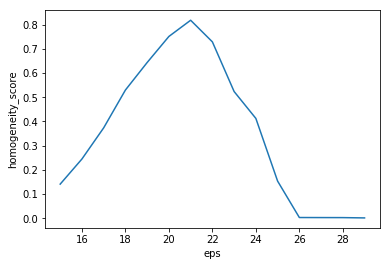

In [42]:
h_scores=[]
s_scores =[]

eps_array = range(15, 30)
for eps in eps_array:
    dbs = DBSCAN(eps=eps)
    dbs.fit(X)
    labels_ = dbs.labels_
    
    h_scores.append(homogeneity_score(y, labels_))
    if len(np.unique(labels_)) != 1:
        s_scores.append(silhouette_score(X, labels_))
    else:
        s_scores.append(-1)

plt.plot(eps_array, h_scores)
plt.xlabel('eps')
plt.ylabel('homogeneity_score')
plt.show()

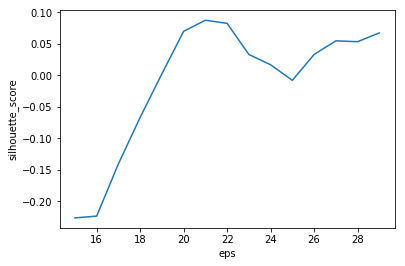

In [44]:
plt.plot(eps_array, s_scores)
plt.xlabel('eps')
plt.ylabel('silhouette_score')
plt.show()

### Визуализация кластеризации.

In [59]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, Birch
pca = PCA(n_components=2, random_state=10)
tsne = TSNE(n_components=2, random_state=10)

pca_X = pca.fit_transform(X)
sne_X = tsne.fit_transform(X)

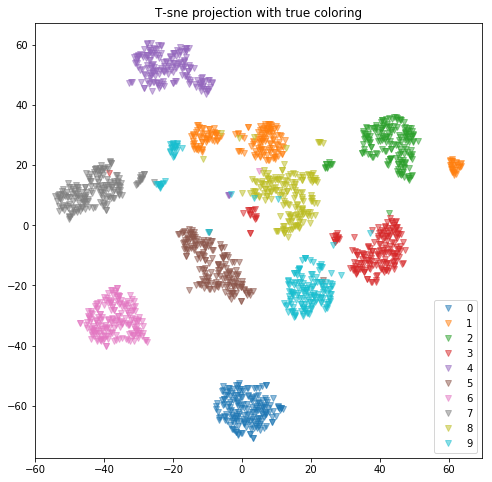

In [60]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v', label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with true coloring')
plt.show()

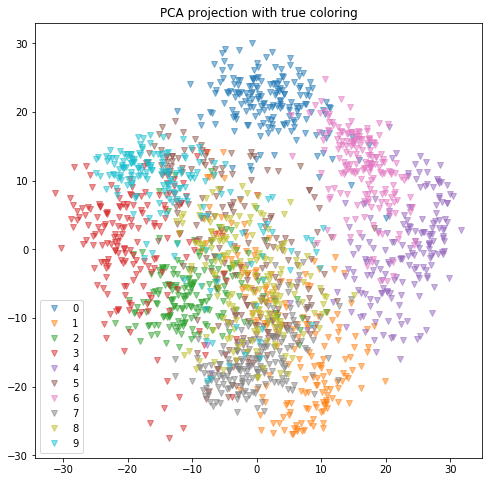

In [61]:
plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v', label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with true coloring')
plt.show()

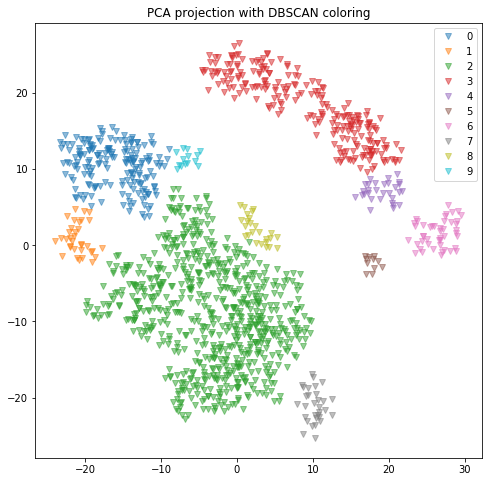

In [62]:
dbs = DBSCAN(eps=1.7, min_samples=10)
y_hat = dbs.fit_predict(pca_X)

plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y_hat == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with DBSCAN coloring')
plt.show()

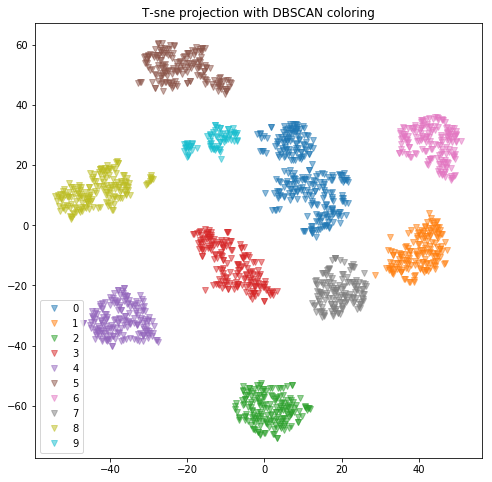

In [63]:
dbs = DBSCAN(eps=7, min_samples=60)
y_hat = dbs.fit_predict(sne_X)

plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y_hat == i
    plt.plot(sne_X[bit_mask, 0], sne_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('T-sne projection with DBSCAN coloring')
plt.show()

**Задание**

Проделайте тоже самое для k-means. Какие результаты у вас получаются относительно DBSCAN? 

**Задание** 

Проведите кластеризацию цифр в исходном пространстве, но визуализируйте результат на проекции. Лучше или хуже получается относительно кластеризации в двумерном пространстве? Используйте гиперпараметры, подобранные в первой части семинара.

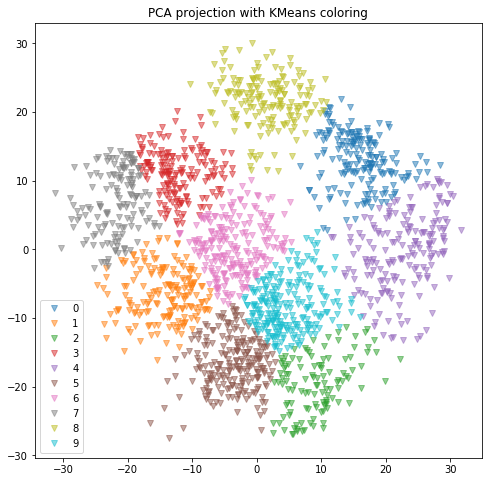

In [68]:
km = KMeans(n_clusters=10)
y_hat = km.fit_predict(pca_X)

plt.figure(figsize=(8, 8))
for i in range(10):
    bit_mask = y_hat == i
    plt.plot(pca_X[bit_mask, 0], pca_X[bit_mask, 1], 'v',label=i,
               alpha=0.5)

plt.legend()
plt.title('PCA projection with KMeans coloring')
plt.show()

### Бонус

Каждый из предложенных алгоритмов будет выдавать различные результаты в зависимости от сида, либо от перестановки данных. Это происходит из-за случайных инициализаций или из-за жадной стратегии, которая работает внутри метода. 

Вы уже знаете, что такое бутстрэп. Запуская один и тот же алгоритм с различными бутстрэпными подвыборками, мы будем получать различные результаты. Посчитав дисперсию получаемых результатов, мы сможем оценить нашу уверенность в получаемых значениях.

1. Проведите кластеризацию на 100 бутстрэпных подвыборках, посчитайте метрики качества.
2. Посчитайте дисперсию полученных векторов.
3. Сделайте выводы.